<a href="https://colab.research.google.com/github/BuiChiCuongs/BAOCAO_AI/blob/main/AI_Kind_of_Money_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, 
Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

In [ ]:
def load_data():
    file = open('/content/drive/MyDrive/Colab Notebooks/money .data', 'rb')

    # dump information to that file
    (pixels, labels) = pickle.load(file)

    # close the file
    file.close()

    print(pixels.shape)
    print(labels.shape)

    return pixels, labels

images, labels = load_data()

(1750, 112, 112, 3)
(1750, 7)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state = 10)
X = X_test
X_train.shape

(1400, 112, 112, 3)

In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [ ]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(1,1), padding = 'same', activation = 'linear', input_shape=(112, 112, 3)))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), strides=(1,1), padding = 'same', activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), strides=(1,1), padding = 'same', activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(7, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])#(learning_rate=0.1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 112, 112, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 56, 56, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                    

In [ ]:
aug = ImageDataGenerator(rotation_range=10,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [ ]:
train = model.fit_generator(aug.flow(X_train, y_train, batch_size=64), epochs=15,verbose = 1)

<ipython-input-8-da761629a4cf>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(aug.flow(X_train, y_train, batch_size=64), epochs=15, validation_data=aug.flow(X_test,y_test, batch_size=64))


Epoch 1/15
22/22 [==============================] - 63s 3s/step - loss: 1.0450 - accuracy: 0.5871 - val_loss: 0.7482 - val_accuracy: 0.6971
Epoch 2/15
22/22 [==============================] - 53s 2s/step - loss: 0.6943 - accuracy: 0.7336 - val_loss: 0.6055 - val_accuracy: 0.7686
Epoch 3/15
22/22 [==============================] - 55s 2s/step - loss: 0.5427 - accuracy: 0.8007 - val_loss: 0.4102 - val_accuracy: 0.8486
Epoch 4/15
22/22 [==============================] - 61s 3s/step - loss: 0.3939 - accuracy: 0.8529 - val_loss: 0.3088 - val_accuracy: 0.8971
Epoch 5/15
22/22 [==============================] - 53s 2s/step - loss: 0.2918 - accuracy: 0.8907 - val_loss: 0.2324 - val_accuracy: 0.9171
Epoch 6/15
22/22 [==============================] - 53s 2s/step - loss: 0.2568 - accuracy: 0.9007 - val_loss: 0.2591 - val_accuracy: 0.8971
Epoch 7/15
22/22 [==============================] - 57s 3s/step - loss: 0.2036 - accuracy: 0.9343 - val_loss: 0.2125 - val_accuracy: 0.9257
Epoch 8/15
22/22 [==

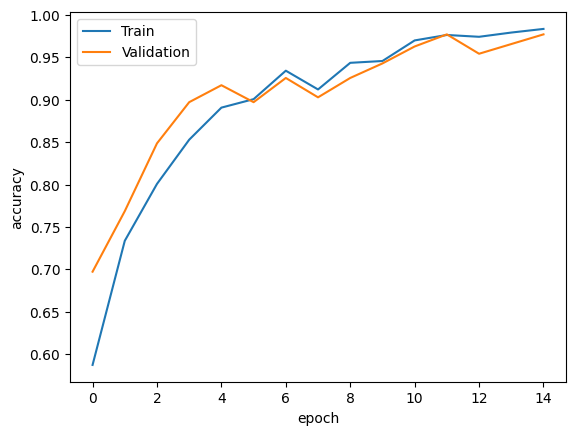

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

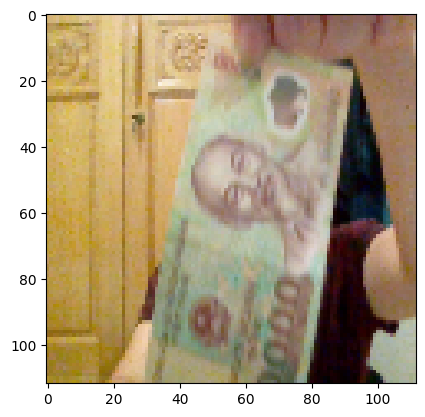

1/1 [==============================] - 1s 683ms/step
[[9.9839479e-01 9.5515112e-05 8.5807550e-12 1.4971787e-03 2.4456879e-06
  9.8864921e-06 8.0756784e-08]]
This picture is:  10000 [9.9839479e-01 9.5515112e-05 8.5807550e-12 1.4971787e-03 2.4456879e-06
 9.8864921e-06 8.0756784e-08]
0.9983948


In [ ]:
class_name = ['10000','100000','20000','200000','5000','50000','500000']
image = X[100]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[100]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))

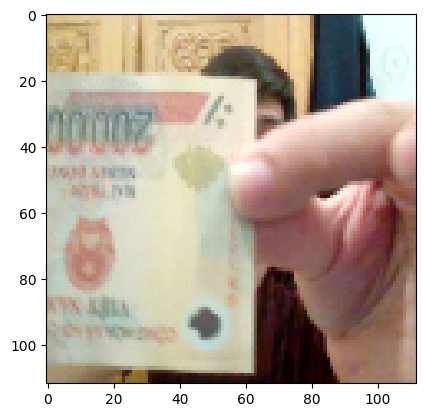

1/1 [==============================] - 0s 58ms/step
[[1.1629736e-04 6.0671155e-04 8.0457105e-14 9.9922812e-01 3.2331847e-08
  3.6512279e-07 4.8521764e-05]]
This picture is:  200000 [1.1629736e-04 6.0671155e-04 8.0457105e-14 9.9922812e-01 3.2331847e-08
 3.6512279e-07 4.8521764e-05]
0.9992281


In [ ]:
image = X[223]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[223]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))

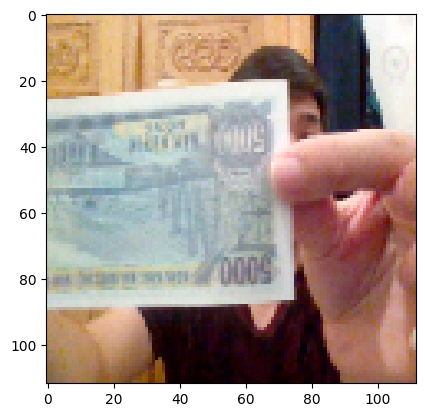

1/1 [==============================] - 0s 59ms/step
[[6.1127632e-15 3.4579778e-12 1.2001637e-09 1.7473427e-18 9.9999988e-01
  1.7347490e-27 7.3406746e-08]]
This picture is:  5000 [6.1127632e-15 3.4579778e-12 1.2001637e-09 1.7473427e-18 9.9999988e-01
 1.7347490e-27 7.3406746e-08]
0.9999999


In [ ]:
image = X[287]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[287]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))

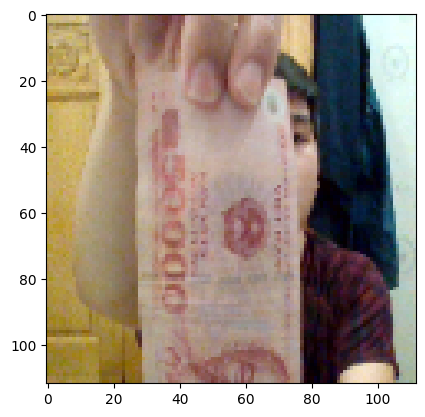

1/1 [==============================] - 0s 65ms/step
[[4.4708595e-05 9.1008888e-11 4.3571300e-14 2.8890291e-02 2.0890017e-08
  9.7106498e-01 1.1609113e-09]]
This picture is:  50000 [4.4708595e-05 9.1008888e-11 4.3571300e-14 2.8890291e-02 2.0890017e-08
 9.7106498e-01 1.1609113e-09]
0.971065


In [ ]:
image = X[280]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[280]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Model/AI_Kind_of_Money.h5')